In [1]:
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
import pandas as pd
from pandas.plotting import register_matplotlib_converters
from sklearn import metrics
register_matplotlib_converters()
plt.style.use('fivethirtyeight')
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder 
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from IPython import display
from ipywidgets import interact, widgets
import plotly.graph_objects as go

sns.set()


In [2]:
games = pd.read_csv('Video_Games_Sales.csv')

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
games.shape

(16719, 16)

In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [6]:
games.describe(include='all')

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
count,16717,16719,16450.000000,16717,16665,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,10015,7590.000000,10096,9950
unique,11562,31,NaN,12,581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96,NaN,1696,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tbd,NaN,Ubisoft,E
freq,12,2161,NaN,3370,1356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2425,NaN,204,3991
mean,NaN,NaN,2006.487356,NaN,NaN,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,NaN,162.229908,NaN,NaN
std,NaN,NaN,5.878995,NaN,NaN,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,NaN,561.282326,NaN,NaN
min,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,NaN,4.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,NaN,10.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,NaN,24.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,NaN,81.000000,NaN,NaN


In [7]:
gamesSales = games.loc[ :, 'Name' : 'Global_Sales'].dropna()

In [8]:
gamesSales['Year_of_Release'] = gamesSales['Year_of_Release'].astype('int')

In [9]:
gamesSales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [10]:
gamesSales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16416 entries, 0 to 16718
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16416 non-null  object 
 1   Platform         16416 non-null  object 
 2   Year_of_Release  16416 non-null  int32  
 3   Genre            16416 non-null  object 
 4   Publisher        16416 non-null  object 
 5   NA_Sales         16416 non-null  float64
 6   EU_Sales         16416 non-null  float64
 7   JP_Sales         16416 non-null  float64
 8   Other_Sales      16416 non-null  float64
 9   Global_Sales     16416 non-null  float64
dtypes: float64(5), int32(1), object(4)
memory usage: 1.3+ MB


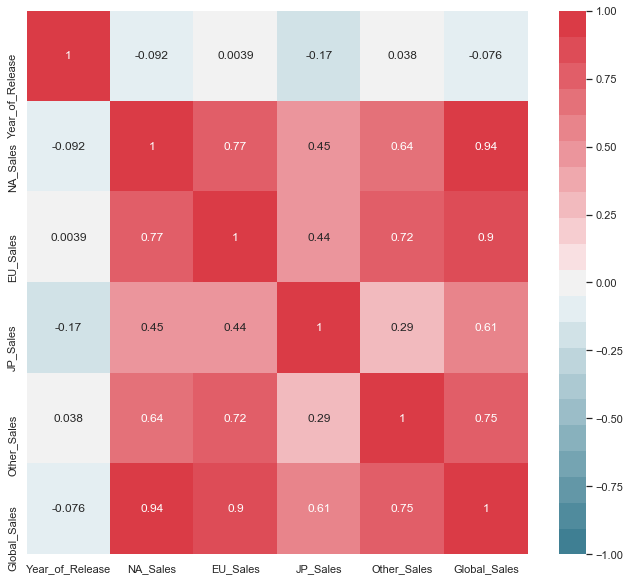

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(gamesSales.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(220, 10, n=21),
            annot=True,
            ax=ax,
           );

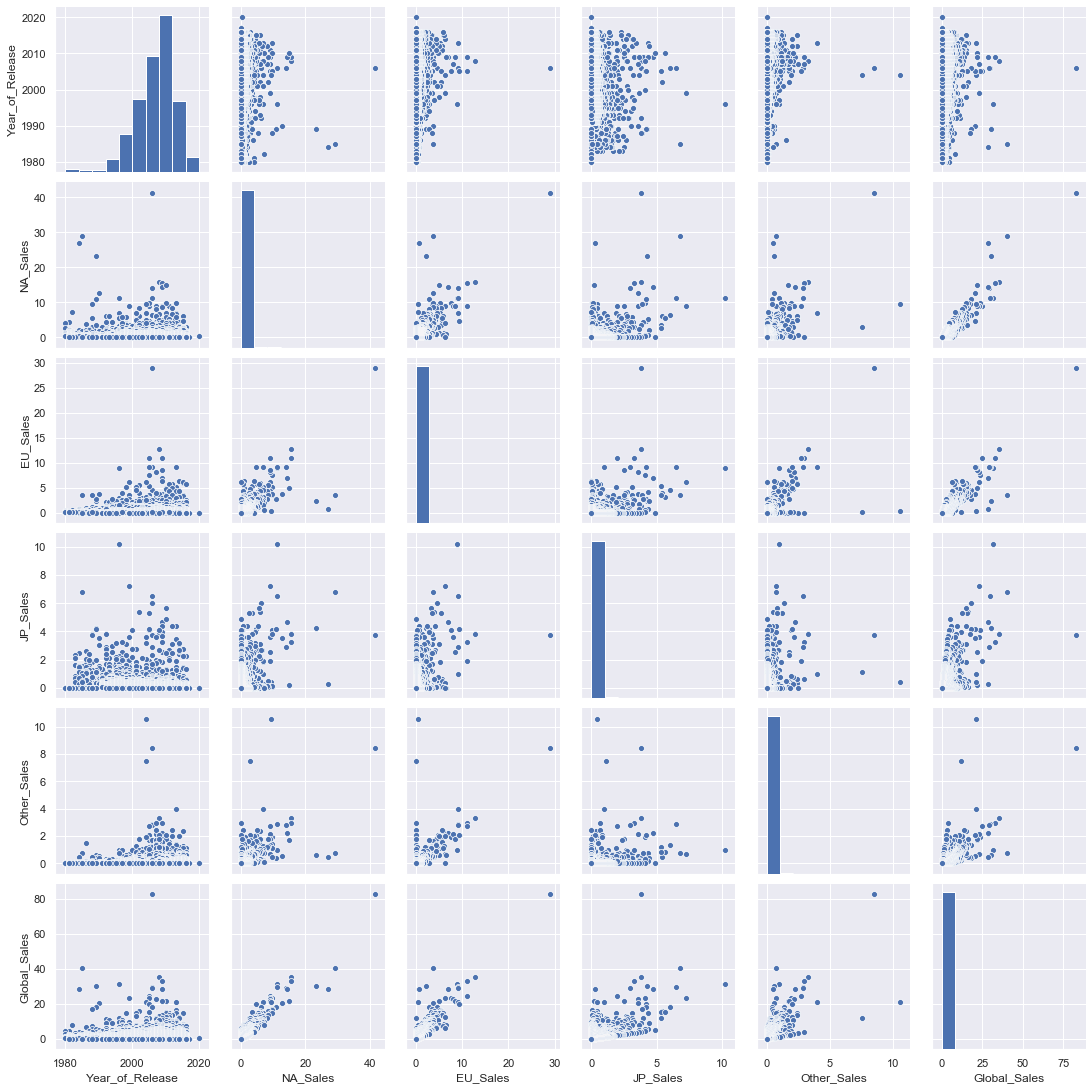

In [12]:
sns.pairplot(gamesSales)

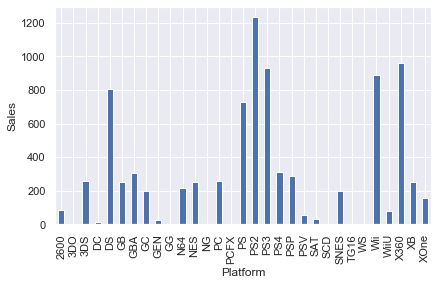

In [13]:
plt.ylabel("Sales")
gamesSales.groupby('Platform')['Global_Sales'].sum().plot(kind='bar'); 

In [14]:
dupe_names = gamesSales.loc[gamesSales.loc[:, 'Name'].duplicated()].Name # defines var for duplicated names in game names 
gamesSales.loc[gamesSales.loc[:,'Name'].isin(dupe_names)] # list all games in games with same name

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
16,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04
17,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
18,Super Mario World,SNES,1990,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61
...,...,...,...,...,...,...,...,...,...,...
16710,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16713,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16714,Samurai Warriors: Sanada Maru,PS3,2016,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01
16717,Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01


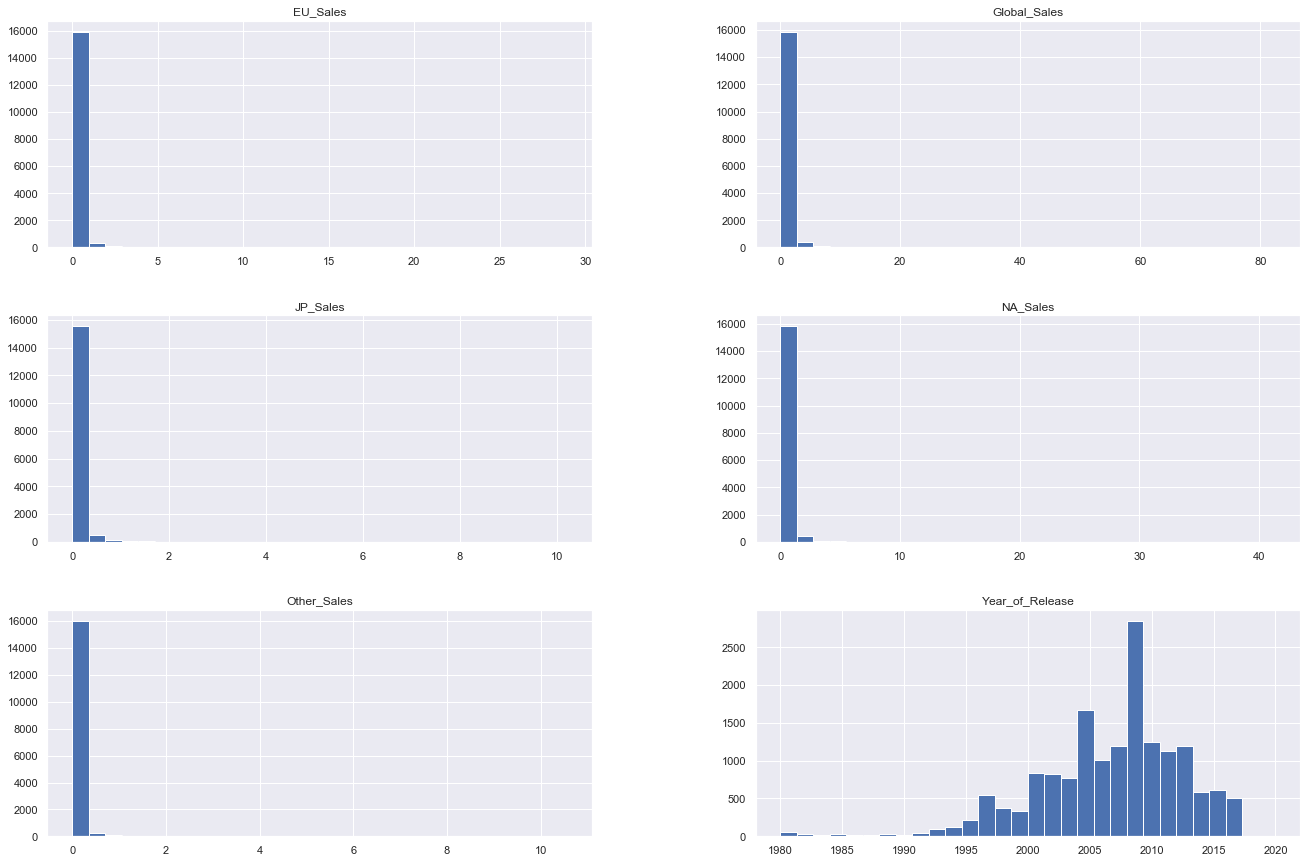

In [15]:
axis = gamesSales.hist(bins =30, figsize = (20,15));

I am going to do some data wranging to find out more about the data set gamesSales.


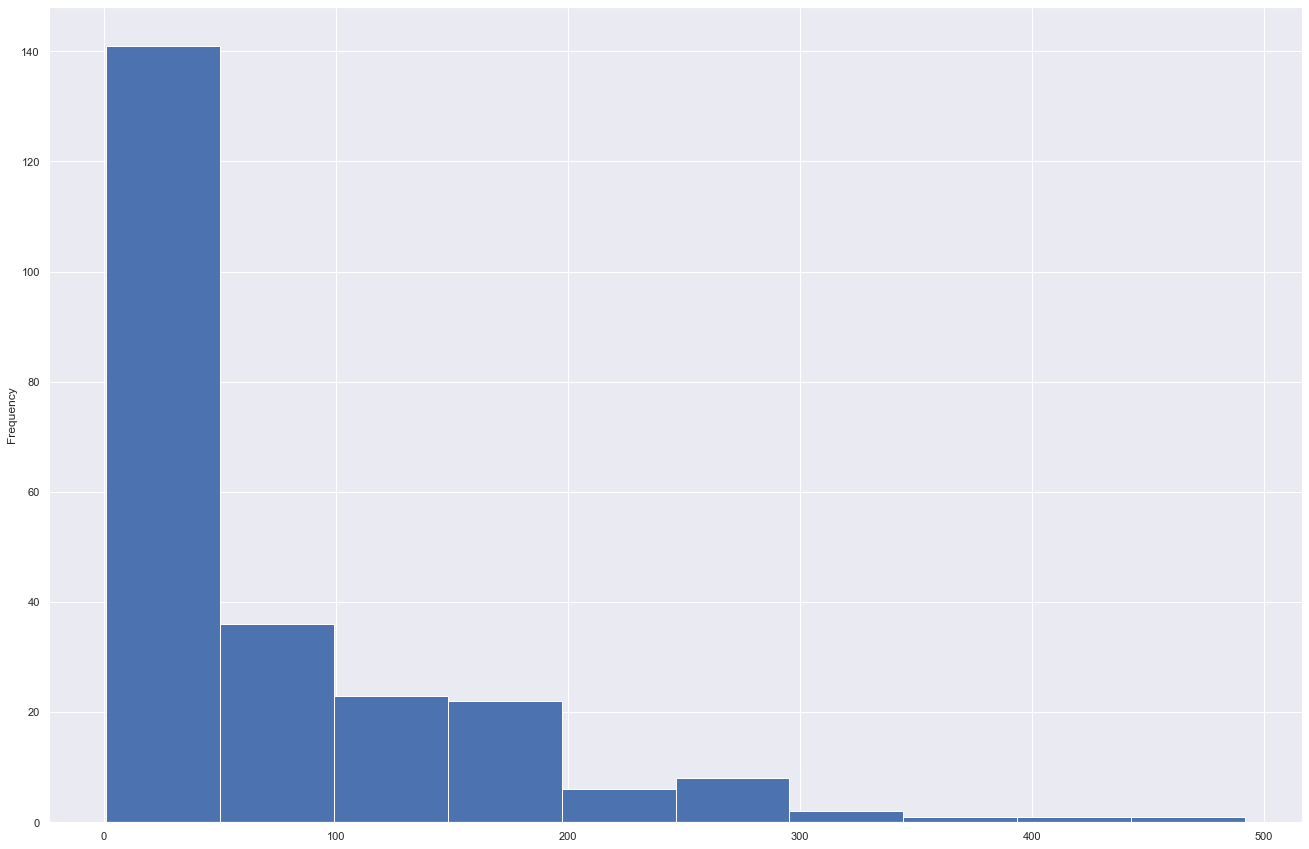

In [16]:
# Number of games released by each platform per year in this data set

gamesSales.groupby('Platform')['Year_of_Release'].value_counts().plot(kind='hist',figsize = (20,15));      

In [17]:
# Total Sale per genre over the life of the data set
gamesSales.groupby('Genre').agg({'Global_Sales': ['sum','count'] })

Global_Sales      
                      sum count
Genre                          
Action            1717.62  3307
Adventure          233.25  1291
Fighting           442.63   837
Misc               783.19  1697
Platform           825.86   878
Puzzle             240.33   569
Racing             723.69  1225
Role-Playing       930.90  1483
Shooter           1041.83  1296
Simulation         388.22   855
Sports            1310.39  2306
Strategy           172.69   672

In [18]:
#Sale per platform over the life of the data set

gamesSales.groupby('Platform').agg({'Global_Sales': ['sum','count'] })

Global_Sales      
                  sum count
Platform                   
2600            86.57   116
3DO              0.10     3
3DS            257.92   512
DC              15.97    52
DS             803.73  2122
GB             254.42    97
GBA            305.62   786
GC             197.14   542
GEN             28.36    27
GG               0.04     1
N64            218.21   316
NES            251.07    98
NG               1.44    12
PC             256.21   952
PCFX             0.03     1
PS             727.41  1190
PS2           1233.46  2127
PS3            931.15  1306
PS4            314.23   393
PSP            289.79  1193
PSV             53.82   429
SAT             33.59   173
SCD              1.87     6
SNES           200.05   239
TG16             0.16     2
WS               1.42     6
Wii            891.74  1286
WiiU            82.16   147
X360           961.39  1232
XB             252.09   803
XOne           159.44   247

In [19]:
#Global game sales per year in the data set
gamesSales.groupby('Year_of_Release')['Global_Sales'].sum()     

Year_of_Release
1980     11.38
1981     35.77
1982     28.86
1983     16.79
1984     50.36
1985     53.94
1986     37.07
1987     21.74
1988     47.22
1989     73.45
1990     49.39
1991     32.23
1992     76.17
1993     45.98
1994     79.18
1995     88.11
1996    199.15
1997    200.98
1998    256.45
1999    251.25
2000    201.58
2001    331.47
2002    395.51
2003    357.80
2004    413.75
2005    456.88
2006    518.22
2007    604.16
2008    671.79
2009    658.88
2010    590.43
2011    507.60
2012    355.84
2013    361.24
2014    331.51
2015    268.05
2016    130.07
2017      0.06
2020      0.29
Name: Global_Sales, dtype: float64

In [20]:
# Best selling game in the history of the platform per the data set
gamesSales.sort_values('Global_Sales', ascending=False).groupby('Platform').Name.first() 

Platform
2600                                   Pac-Man
3DO                                Policenauts
3DS                        Pokemon X/Pokemon Y
DC                             Sonic Adventure
DS                       New Super Mario Bros.
GB                    Pokemon Red/Pokemon Blue
GBA              Pokemon Ruby/Pokemon Sapphire
GC                     Super Smash Bros. Melee
GEN                       Sonic the Hedgehog 2
GG                Sonic the Hedgehog 2 (8-bit)
N64                             Super Mario 64
NES                          Super Mario Bros.
NG                          Samurai Shodown II
PC                                  The Sims 3
PCFX        Blue Breaker: Ken Yorimo Hohoemi o
PS                                Gran Turismo
PS2              Grand Theft Auto: San Andreas
PS3                         Grand Theft Auto V
PS4                  Call of Duty: Black Ops 3
PSP     Grand Theft Auto: Liberty City Stories
PSV                                  Minecraft
SAT 

In [21]:
# Best selling game in the history by Genre per the data set
gamesSales.sort_values('Global_Sales', ascending=False).groupby('Genre').Name.first() 

Genre
Action                          Grand Theft Auto V
Adventure       Super Mario Land 2: 6 Golden Coins
Fighting                   Super Smash Bros. Brawl
Misc                                      Wii Play
Platform                         Super Mario Bros.
Puzzle                                      Tetris
Racing                              Mario Kart Wii
Role-Playing              Pokemon Red/Pokemon Blue
Shooter                                  Duck Hunt
Simulation                              Nintendogs
Sports                                  Wii Sports
Strategy                           Pokemon Stadium
Name: Name, dtype: object

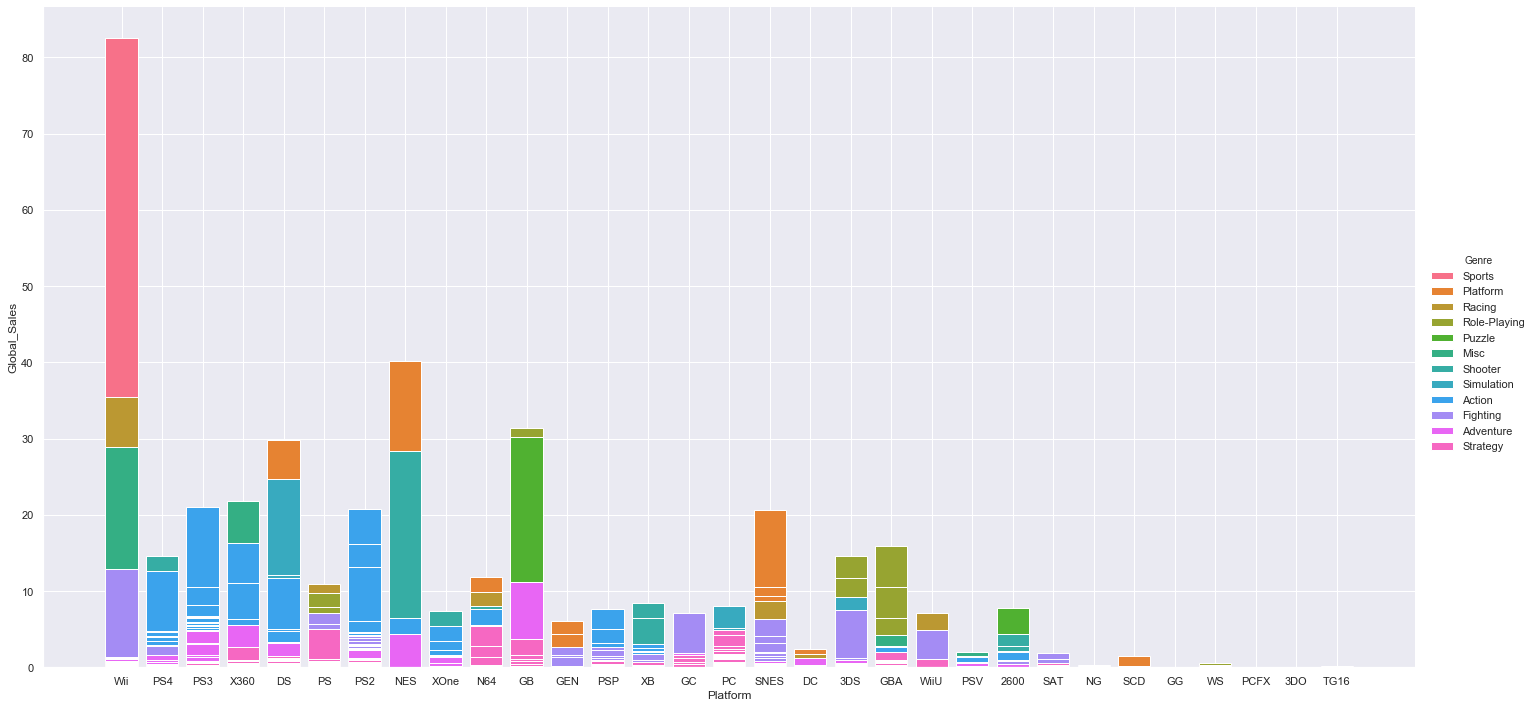

In [26]:
sns.FacetGrid(gamesSales, hue="Genre", height=10, aspect = 2) \
   .map(plt.bar, "Platform", "Global_Sales") \
   .add_legend();

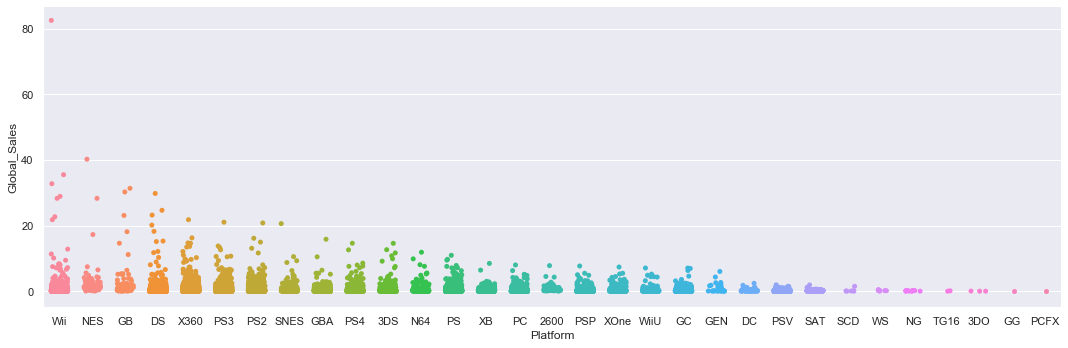

In [27]:
sns.catplot(x='Platform', y='Global_Sales', 
            data=gamesSales,jitter='0.25', height= 5, aspect = 3);

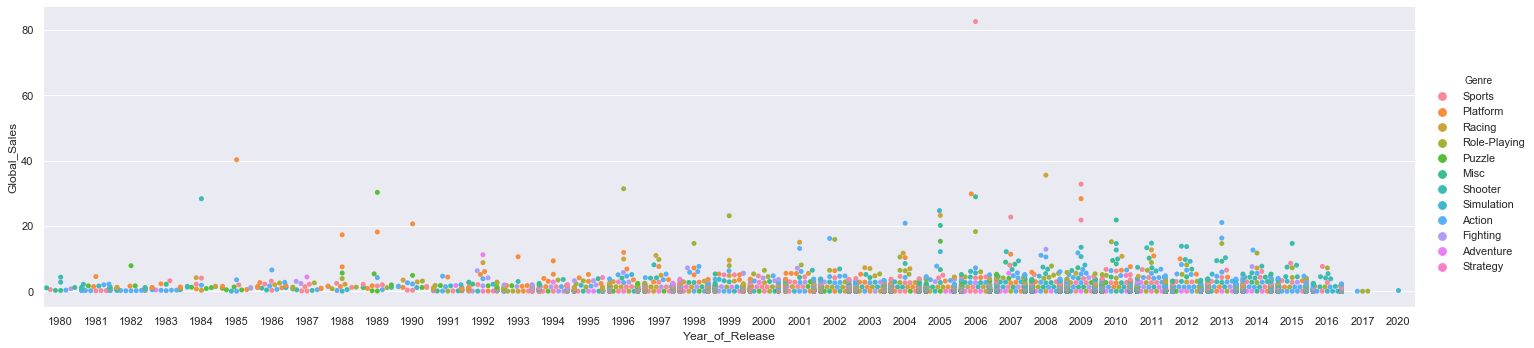

In [24]:
sns.catplot(x="Year_of_Release", y="Global_Sales", hue="Genre", kind="swarm", data=gamesSales, height= 5, aspect = 4);

In [28]:
def plotyear(year):
    data = gamesSales[gamesSales.Year_of_Release == year]
    area = 5e-6 * data.NA_Sales
    colors = data.Genre.map({'Sports': 'skyblue', 'Platform': 'gold', 'Racing': 'palegreen', 'Role-Playing': 'coral', 'Puzzle' : 'black', 'Misc': 'darksalmon' , 'Shooter' : 'bisque', 'Simulation' : 'olivedrab', 'Action' : 'orange', 'Fighting' : 'teal', 'Adventure' : 'crimson', 'Strategy' : 'lime'})
    
    data.plot.scatter('Name', "Global_Sales",
                      s=area,c=colors,
                      linewidths=1,edgecolors='k',
                      figsize=(24,18))
    
   
    plt.xlabel('Name of Video Game')
    plt.ylabel('Worldwide Sales ')

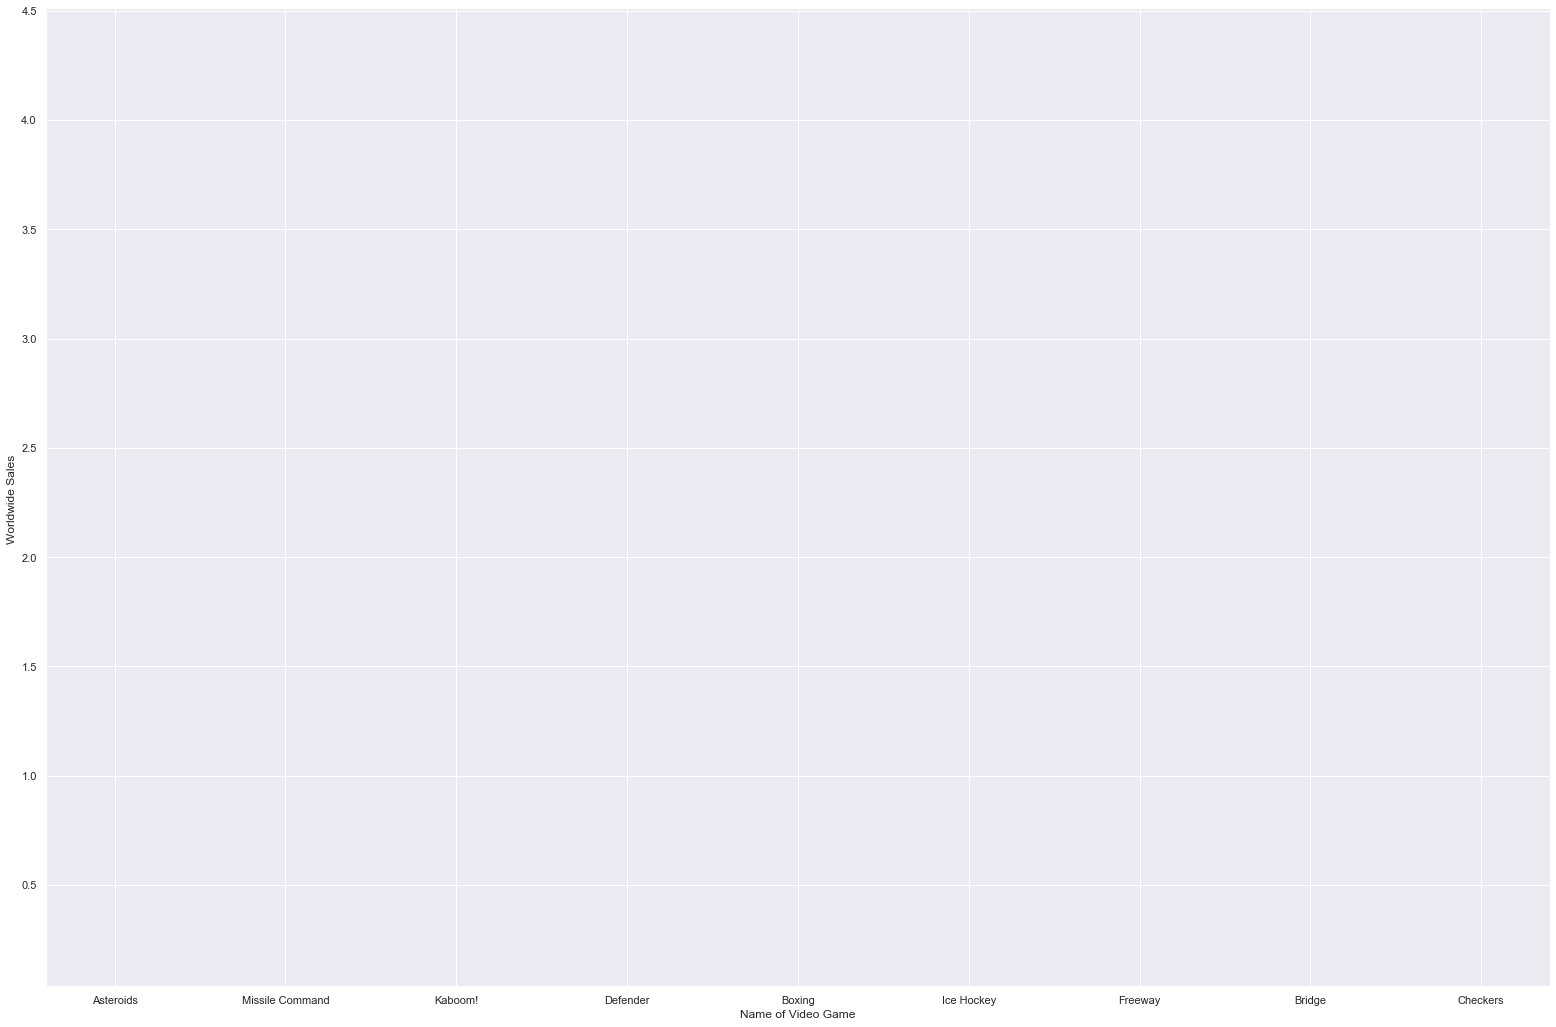

<function __main__.plotyear(year)>

In [29]:
interact(plotyear, year=widgets.IntSlider(min=1980,max=2020,step=1))

In [25]:
target_col = 'Global_Sales'
feature_cols = ['Year_of_Release',
                'NA_Sales', 'EU_Sales', 'JP_Sales']

X = gamesSales.loc[:,feature_cols]

y = gamesSales.loc[:,target_col]

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

# Splitting both target and features data into a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 16)

# Creating a linear regression model instance and fitting the training data to it
lr_gamesSales = LinearRegression()
lr_gamesSales.fit(X_train, y_train)
lr_gamesSales.score(X_test, y_test)

# Evaluating the model 
print('Test Data R-Squared:', lr_gamesSales.score(X_test, y_test))       # Comparing test data to null model/finding R-Squared 
print('Training Data R-Squared:', lr_gamesSales.score(X_train, y_train)) # Comparing test data to null model/finding R-Squared 

y_pred = lr_gamesSales.predict(X_test)
print('Test Data RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Finding RMSE
print ('Test Data MAE:', metrics.mean_absolute_error(y_test, y_pred))         # Finding MAE

Test Data R-Squared: 0.998268132008275
Training Data R-Squared: 0.990616259485546
Test Data RMSE: 0.07784824748937491
Test Data MAE: 0.02542352759004321
